# <a>Santander Product Recommendation - Part 2</a>

> ##  <a>  Model Building </a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth =150

In [2]:
# Read the sampled data for training the model
sampled_data = pd.read_csv("Sampled_data.csv")
result_data = pd.DataFrame(columns=["Customer_id", "already_active_product", "recommended_products_excluding_active", "Actual_bought_product_excluding_active"])

In [3]:
sampled_data.head()

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
0,2015-01-28,1375586,0,35,0.0,0.0,1,1,1.0,87218.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,2015-01-28,1050619,0,24,0.0,2.0,1,1,0.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,2015-01-28,1050620,0,23,0.0,2.0,1,1,0.0,113194.980000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,2015-01-28,1050622,0,23,0.0,2.0,1,1,0.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,2015-01-28,1050623,0,23,0.0,2.0,1,1,1.0,113538.810000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [4]:
sampled_data.shape

(5444715, 46)

In [5]:
sampled_data.head()

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
0,2015-01-28,1375586,0,35,0.0,0.0,1,1,1.0,87218.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,2015-01-28,1050619,0,24,0.0,2.0,1,1,0.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,2015-01-28,1050620,0,23,0.0,2.0,1,1,0.0,113194.980000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,2015-01-28,1050622,0,23,0.0,2.0,1,1,0.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,2015-01-28,1050623,0,23,0.0,2.0,1,1,1.0,113538.810000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [6]:
# Convert Datetime column type object to datetime
sampled_data['date_of_partition']  = pd.to_datetime(sampled_data['date_of_partition'], format = "%Y-%m")

In [7]:
sampled_data["customer_id"].nunique()

379846

In [8]:
# Sample the data for Analysis 
unique_ids = pd.Series(sampled_data["customer_id"].unique())
unique_id = unique_ids.sample(frac=0.1, random_state =100)
sampled_data = sampled_data[sampled_data.customer_id.isin(unique_id)]
sampled_data.shape

(545328, 46)

In [9]:
# Create a result dataframe for storing the customer recommanded items
result_data["Customer_id"] =  sampled_data["customer_id"].unique()

In [10]:
sampled_data.head()

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
12,2015-01-28,1050591,0,23,0.0,2.0,1,1,1.0,58728.390000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1
24,2015-01-28,1050706,0,33,0.0,2.0,1,1,1.0,84061.950000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
32,2015-01-28,1050636,0,23,0.0,2.0,1,1,1.0,136930.230000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,1
47,2015-01-28,1050503,1,23,0.0,2.0,1,1,1.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1
51,2015-01-28,1050560,0,23,0.0,2.0,1,1,1.0,59537.490000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [11]:
# Products columns 
product_cols = ['cust_saving_accnt', 'cust_guarntees',
                'cust_current_accnt', 'cust_derivative_accnt',
                'cust_payroll_accnt', 'cust_junior_accnt', 
                'cust_mass_particualr_accnt', 'cust_particualr_accnt',
                'cust_particular_plus_accnt', 'cust_shrt_term_deposit',
                'cust_med_term_deposit', 'cust_long_term_deposit',
                'cust_e_account', 'cust_funds', 'cust_mortage', 
                'cust_pensions', 'cust_loans', 'cust_taxes',
                'cust_credit_card', 'cust_securities', 'cust_home_account',
                'cust_payroll', 'cust_pension_2', 'cust_direct_debit']

In [12]:
sampled_data.sort_values(["customer_id", "date_of_partition"]).head(17)

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
164662,2015-01-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
330719,2015-02-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
662472,2015-03-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
828461,2015-04-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1162752,2015-05-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1414364,2015-06-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1619409,2015-07-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
2115182,2015-08-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
2269251,2015-09-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
2750783,2015-10-28,15928,0,49,0.0,20.0,1,1,1.0,263023.98,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545328 entries, 12 to 5444703
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date_of_partition                545328 non-null  datetime64[ns]
 1   customer_id                      545328 non-null  int64         
 2   cust_sex                         545328 non-null  int64         
 3   cust_age                         545328 non-null  int64         
 4   cust_new_index                   545328 non-null  float64       
 5   cust_antiquity                   545328 non-null  float64       
 6   cust_is_prim                     545328 non-null  int64         
 7   cust_foreigner_index             545328 non-null  int64         
 8   cust_active_index                545328 non-null  float64       
 9   cust_gross_income                545328 non-null  float64       
 10  cust_saving_accnt                545328 no

In [14]:
# train data is for 1 year Jan 2015 to Dec 2015
# test data is for 5 months Jan 2016 to May 2016

train_data = sampled_data[sampled_data['date_of_partition'].dt.year == 2015]
test_data = sampled_data[sampled_data['date_of_partition'].dt.year == 2016]

In [15]:
train_data["customer_id"].nunique()

36838

In [16]:
test_data = test_data[test_data["customer_id"].isin(train_data["customer_id"].unique())]

In [17]:
test_data["customer_id"].nunique()

36406

In [18]:
train_data.head()

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
12,2015-01-28,1050591,0,23,0.0,2.0,1,1,1.0,58728.390000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1
24,2015-01-28,1050706,0,33,0.0,2.0,1,1,1.0,84061.950000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
32,2015-01-28,1050636,0,23,0.0,2.0,1,1,1.0,136930.230000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,1
47,2015-01-28,1050503,1,23,0.0,2.0,1,1,1.0,116153.170033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1
51,2015-01-28,1050560,0,23,0.0,2.0,1,1,1.0,59537.490000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


## <a> Naive Bayes </a>

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import BernoulliNB
from collections import defaultdict

In [20]:
customer_sampled_data = sampled_data.drop(product_cols, axis =1)

In [21]:
customer_sampled_data.head()

,date_of_partition,customer_id,cust_sex,cust_age,cust_new_index,cust_antiquity,cust_is_prim,cust_foreigner_index,cust_active_index,cust_gross_income,is_joined_this_month,cust_relation_I,cust_relation_Others,cust_channel_KFC,cust_channel_KHE,cust_channel_Others,cust_province_name_MADRID,cust_province_name_Others,cust_province_name_SEVILLA,cust_province_name_VALENCIA,cust_segment_02 - PARTICULARES,cust_segment_03 - UNIVERSITARIO
12,2015-01-28,1050591,0,23,0.0,2.0,1,1,1.0,58728.390000,0,0,0,0,1,0,0,1,0,0,0,1
24,2015-01-28,1050706,0,33,0.0,2.0,1,1,1.0,84061.950000,0,1,0,0,1,0,0,1,0,0,0,1
32,2015-01-28,1050636,0,23,0.0,2.0,1,1,1.0,136930.230000,0,0,0,0,1,0,0,1,0,0,0,1
47,2015-01-28,1050503,1,23,0.0,2.0,1,1,1.0,116153.170033,0,0,0,0,1,0,0,1,0,0,0,1
51,2015-01-28,1050560,0,23,0.0,2.0,1,1,1.0,59537.490000,0,0,0,0,1,0,0,1,0,0,0,1


In [22]:
models = {}
model_preds = {}
id_preds = defaultdict(list)
ids = train_data['customer_id'].values
for col in train_data[product_cols].columns:
    print(col)
    y_train = train_data[col]
    x_train = train_data.drop([col, 'customer_id', "date_of_partition"], 1)
        
    clf = BernoulliNB()
    clf.fit(x_train, y_train)
    p_train = clf.predict_proba(x_train)[:,1]
    models[col] = clf
    model_preds[col] = p_train
    for id, p in zip(ids, p_train):
        id_preds[id].append(p)
    #print(y_train)
            
    print(roc_auc_score(y_train, p_train))
        

cust_saving_accnt
0.9890425238684566
cust_guarntees
0.9999981502137428
cust_current_accnt
0.7779055541108176
cust_derivative_accnt
0.9532934889027028
cust_payroll_accnt
0.9777218213995855
cust_junior_accnt
0.9868020198958387
cust_mass_particualr_accnt
0.8250717446916856
cust_particualr_accnt
0.785116385943417
cust_particular_plus_accnt
0.8301188390059125
cust_shrt_term_deposit
0.9364462852571771
cust_med_term_deposit
0.8930155880361217
cust_long_term_deposit
0.8720072360152932
cust_e_account
0.878486816620342
cust_funds
0.8862070049061683
cust_mortage
0.9387441835364098
cust_pensions
0.896262579532954
cust_loans
0.9283196086942048
cust_taxes
0.8827643550338868
cust_credit_card
0.9322479766880728
cust_securities
0.8787215399714104
cust_home_account
0.8126417087982704
cust_payroll
0.996438432834629
cust_pension_2
0.9977437133105038
cust_direct_debit
0.9152212949264784


In [23]:
# Taking the unique customers
product_cols.insert(0,"customer_id")
train_data= train_data[product_cols].groupby("customer_id").sum().reset_index()
train_data.head()

,customer_id,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
0,15928,0,0,12,0,0,0,0,12,0,0,0,0,0,12,0,0,0,0,1,0,0,0.0,0.0,0
1,15937,0,0,12,0,12,0,0,0,12,0,0,0,12,12,0,12,0,12,6,12,0,3.0,3.0,12
2,15949,0,0,12,0,0,0,0,12,12,0,0,0,0,0,0,12,0,12,12,0,0,0.0,0.0,4
3,15985,0,0,11,0,0,0,0,12,12,0,0,0,0,0,10,0,10,0,0,12,0,0.0,0.0,12
4,16036,0,0,12,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,12,12,0,0.0,0.0,12


In [24]:
train_data["customer_id"].nunique()

36838

In [25]:
train_data.head()

,customer_id,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
0,15928,0,0,12,0,0,0,0,12,0,0,0,0,0,12,0,0,0,0,1,0,0,0.0,0.0,0
1,15937,0,0,12,0,12,0,0,0,12,0,0,0,12,12,0,12,0,12,6,12,0,3.0,3.0,12
2,15949,0,0,12,0,0,0,0,12,12,0,0,0,0,0,0,12,0,12,12,0,0,0.0,0.0,4
3,15985,0,0,11,0,0,0,0,12,12,0,0,0,0,0,10,0,10,0,0,12,0,0.0,0.0,12
4,16036,0,0,12,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,12,12,0,0.0,0.0,12


In [26]:
# Checking the alredy active products for each customer

already_active = {}
for row in train_data.values:
    row = list(row)
    #print(row)
    customer_id = row[0]
    
    active = [c[0] for c in zip(train_data[product_cols].columns[1:], row[1:]) if c[1] > 0]
    already_active[customer_id] = active
    #print(active)    
    result_data.loc[result_data['Customer_id'] == customer_id, 'already_active_product'] = str(active)
    


In [27]:
# add 3 products(that user don't have yet), higher probability first -> train_pred   

train_preds = {}
for id, prob in id_preds.items():
    
    preds = [i[0] for i in sorted([i for i in zip(train_data[product_cols].columns[1:], prob) if i[0] not in already_active[id]],
                                  key=lambda i:i [1], 
                                  reverse=True)[:9]]
    #print(preds)
    train_preds[id] = preds
    result_data.loc[result_data['Customer_id'] == id, 'recommended_products_excluding_active'] = str(preds)


In [28]:
test_data= test_data[product_cols].groupby("customer_id").sum().reset_index()
test_data.head()

,customer_id,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
0,15928,0,0,5,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,1,0,0,0.0,0.0,0
1,15937,0,0,5,0,4,0,0,0,5,0,0,0,5,5,0,5,0,5,0,5,0,0.0,0.0,5
2,15949,0,0,5,0,0,0,0,5,5,0,0,0,0,0,0,5,0,5,5,0,0,0.0,0.0,4
3,15985,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,5,0,0.0,0.0,5
4,16036,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,5,5,0,0.0,0.0,5


In [29]:
# Checking the product bought by consumer

for row in test_data.values:
    row = list(row)
    customer_id = row[0]
    
    bought_products = [c[0] for c in zip(test_data[product_cols].columns[1:], row[1:]) if (c[1] > 0) and (c[0] not in already_active[customer_id]) ]
    
    result_data.loc[result_data['Customer_id'] == customer_id, 'Actual_bought_product_excluding_active'] = str(bought_products)

In [30]:
result_data[result_data["Customer_id"]==1516827]

,Customer_id,already_active_product,recommended_products_excluding_active,Actual_bought_product_excluding_active
36608,1516827,['cust_current_accnt'],"['cust_shrt_term_deposit', 'cust_mass_particualr_accnt', 'cust_direct_debit', 'cust_long_term_deposit', 'cust_junior_accnt', 'cust_e_account', 'cu...","['cust_mass_particualr_accnt', 'cust_e_account']"


## Evaluation Matrix

In [32]:
# Calcualtion of product 2 score
def extract_prod_score(row):
    prod_bought = list(row["Actual_bought_product_excluding_active"].strip('][').split(', '))
    prod_rec = list(row["recommended_products_excluding_active"].strip('][').split(', '))
    if prod_bought[0] in prod_rec:
            return 1
    else:
        return 0

In [33]:
# Calcualtion of product 2 score
def extract_prod_score_2(row):
    prod_bought = list(row["Actual_bought_product_excluding_active"].strip('][').split(', '))
    prod_rec = list(row["recommended_products_excluding_active"].strip('][').split(', '))
    if len(prod_bought) >=2:
        if prod_bought[0] in prod_rec:
            return 1
        else:
            return 0
    return 0

In [34]:
# Score for product1 and product 2 
result_data["product1_score"]= result_data.apply(extract_prod_score, axis =1)
result_data["product2_score"]= result_data.apply(extract_prod_score_2, axis =1)

In [35]:
# accuracy calucation for product 1
accuracy = (100*result_data.groupby("product1_score")["product1_score"].sum()[1]/len(result_data[result_data["Actual_bought_product_excluding_active"] !="[]"])).round(3)
# accuacy calcuation for product 2
accuracy_prod_2 = (100*result_data.groupby("product2_score")["product2_score"].sum()[1]/len(result_data[result_data["Actual_bought_product_excluding_active"] !="[]"])).round(3)

In [42]:
# Accuracy_1 total_customer_bought_prodouct_1/ total_customer_who_bought
#result_data = result_data.dropna()
result_data[result_data["Actual_bought_product_excluding_active"] != "[]"].sample(5)

,Customer_id,already_active_product,recommended_products_excluding_active,Actual_bought_product_excluding_active,product1_score,product2_score
16571,32094,"['cust_current_accnt', 'cust_e_account', 'cust_mortage', 'cust_credit_card', 'cust_direct_debit']","['cust_saving_accnt', 'cust_guarntees', 'cust_derivative_accnt', 'cust_payroll_accnt', 'cust_junior_accnt', 'cust_mass_particualr_accnt', 'cust_pa...","['cust_payroll_accnt', 'cust_taxes', 'cust_payroll', 'cust_pension_2']",1,1
9598,1162978,['cust_current_accnt'],"['cust_particular_plus_accnt', 'cust_shrt_term_deposit', 'cust_med_term_deposit', 'cust_long_term_deposit', 'cust_saving_accnt', 'cust_guarntees',...",['cust_direct_debit'],0,0
36154,1511059,['cust_current_accnt'],"['cust_junior_accnt', 'cust_payroll_accnt', 'cust_securities', 'cust_credit_card', 'cust_funds', 'cust_e_account', 'cust_med_term_deposit', 'cust_...",['cust_mass_particualr_accnt'],0,0
7461,1278839,['cust_current_accnt'],"['cust_long_term_deposit', 'cust_saving_accnt', 'cust_guarntees', 'cust_derivative_accnt', 'cust_payroll_accnt', 'cust_junior_accnt', 'cust_mass_p...","['cust_payroll', 'cust_pension_2']",0,0
16262,115721,"['cust_payroll_accnt', 'cust_particualr_accnt', 'cust_particular_plus_accnt', 'cust_pensions', 'cust_taxes', 'cust_credit_card', 'cust_payroll', '...","['cust_e_account', 'cust_mortage', 'cust_loans', 'cust_securities', 'cust_home_account', 'cust_funds', 'cust_saving_accnt', 'cust_current_accnt', ...",['cust_e_account'],1,0


In [36]:
accuracy

37.509

In [37]:
accuracy_prod_2

15.518

In [38]:
# Accuracy at 3 = 13.7%
# accuracy at 5  = 30%
# accuracy at 7 = 30.8%
# accuracy at 9 = 37.5%
# accuracy at 15  = 67%

In [39]:
# Accuracy for prod 2 at 3 = 4.7%
# Accuracy for prod 2 at 7 = 12.6%
# Accuracy for prod 2 at 9 = 15.58%
# Accuracy for prod 2 at 15 = 22%

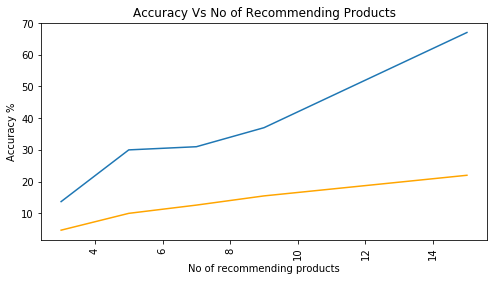

In [41]:
x_axis = [3, 5, 7, 9, 15]
y_axis = [13.7, 30, 31, 37, 67]
acc_2 = [4.7, 10, 12.6, 15.5, 22]

plt.figure(figsize=(8,4))
sns.lineplot(x = x_axis, y=y_axis)
sns.lineplot(x = x_axis, y=acc_2, color ='orange')
plt.plot()
plt.xticks(rotation=90)
plt.title("Accuracy Vs No of Recommending Products")
plt.ylabel('Accuracy %')
plt.xlabel('No of recommending products')
plt.show()